# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [3]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [6]:
import h5py

# Open the file as read only
h5f = h5py.File('/content/drive/MyDrive/DSML/ElectiveProject/DeepLearning/SVHN_single_grey1.h5',"r")

# Load the training and the test dataset
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
There are 42K images in training and 18K images in testing datasets respectively

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

The first 10 images in the dataset and their corresponding labels are:


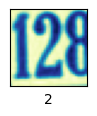

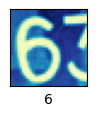

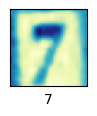

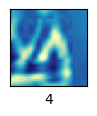

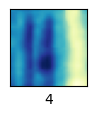

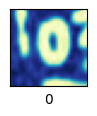

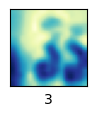

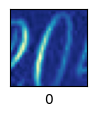

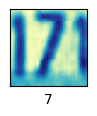

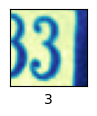

In [36]:
# Visualizing the first 10 images in the dataset and printing their labels
print("The first 10 images in the dataset and their corresponding labels are:")
for i in range(10):
    fig, ax = plt.subplots(figsize=(3,1))
    plt.imshow(X_train[i], cmap = "YlGnBu")
    plt.xlabel("{}".format(y_train[i]))
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [37]:
# Shape and the array of pixels for the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [38]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [39]:
# Normalize inputs from 0-255 to 0-1 by dividing by 255 to get the new ranges from 0-1
X_train = X_train/255
X_test = X_test/255

Print the shapes of Training and Test data

In [40]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [41]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [42]:
print(y_test_encoded)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:**
Each entry in the target file is now one-hot encoded compared to the single value


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [43]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [44]:
# define nn_model_1 function:
def nn_model_1():

    # Intializing a sequential model
    model = Sequential()

    # Flatten the input to add dense convolutional layers on top of it
    model.add(Flatten(input_shape=(1024,)))

    # Adding a sequential layer with 64 neurons
    model.add(Dense(64, activation='relu'))

    # Adding a sequential layer with 32 neurons
    model.add(Dense(32, activation='relu'))

    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    model.add(Dense(10, activation='softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate=0.001)

    # Compile model
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # return the model
    return model

In [45]:
# build the ANN model
model1 = nn_model_1()

In [46]:
# ANN model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [47]:
# fit the model
fit_history1 = model1.fit(X_train, y_train_encoded,validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 128)

Epoch 1/20
263/263 [==============================] - 4s 10ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 6ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 2s 6ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 2s 6ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 1s 6ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch

### **Plot the Training and Validation Accuracies and write down your Observations.**

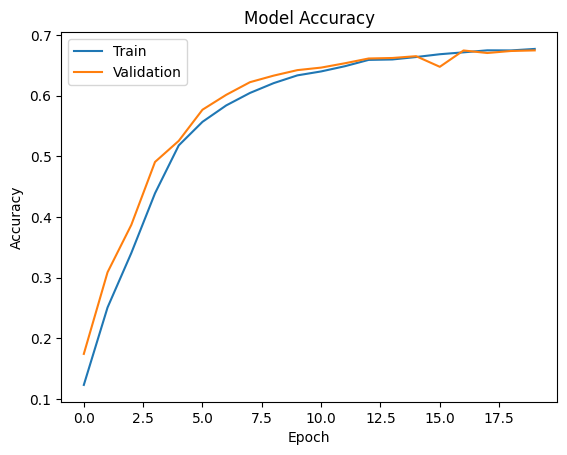

In [48]:
plt.plot(fit_history1.history['accuracy'])
plt.plot(fit_history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:_______**

The accuracy of model 2 has improved compared to model 1.
For model 2: training accuracy = 67%, validation accuracy = 67%

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [49]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Fixing the seed for random number generators

#np.random.seed(42)

#import random

#random.seed(42)

#tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [50]:
# define nn_model_2 function:
def nn_model_2():

    # Intializing a sequential model
    model = Sequential()

    # Flatten the input to add dense convolutional layers on top of it
    model.add(Flatten(input_shape=(1024,)))

    # Adding a sequential layer with 256 neurons
    model.add(Dense(256, activation='relu'))

    # Adding a sequential layer with 128 neurons
    model.add(Dense(128, activation='relu'))

    # Adding a sequential layer with dropout = 0.2
    model.add(Dropout(0.2))

    # Adding a sequential layer with 64 neurons
    model.add(Dense(64, activation='relu'))

    # Adding a sequential layer with 64 neurons
    model.add(Dense(64, activation='relu'))

    # Adding a sequential layer with 32 neurons
    model.add(Dense(32, activation='relu'))

    # Adding a sequential layer with BatchNormalization
    model.add(BatchNormalization())

    # Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
    model.add(Dense(10, activation='softmax'))

    # Using Adam Optimizer
    opt = Adam(learning_rate=0.0005)

    # Compile model
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # return the model
    return model

In [51]:
# build the ANN model
model2 = nn_model_2()

In [52]:
# ANN model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [53]:
# fit the model
fit_history2 = model2.fit(X_train, y_train_encoded,validation_split = 0.2, verbose = 1, epochs = 30, batch_size = 128)

Epoch 1/30
263/263 [==============================] - 5s 13ms/step - loss: 2.3301 - accuracy: 0.1020 - val_loss: 2.3126 - val_accuracy: 0.0969
Epoch 2/30
263/263 [==============================] - 3s 12ms/step - loss: 2.3040 - accuracy: 0.1043 - val_loss: 2.3018 - val_accuracy: 0.1049
Epoch 3/30
263/263 [==============================] - 4s 16ms/step - loss: 2.1035 - accuracy: 0.2029 - val_loss: 1.9555 - val_accuracy: 0.2789
Epoch 4/30
263/263 [==============================] - 5s 19ms/step - loss: 1.6221 - accuracy: 0.4240 - val_loss: 1.5954 - val_accuracy: 0.4607
Epoch 5/30
263/263 [==============================] - 5s 19ms/step - loss: 1.3656 - accuracy: 0.5424 - val_loss: 1.2720 - val_accuracy: 0.5899
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 1.1958 - accuracy: 0.6150 - val_loss: 1.1094 - val_accuracy: 0.6462
Epoch 7/30
263/263 [==============================] - 3s 12ms/step - loss: 1.1250 - accuracy: 0.6400 - val_loss: 1.0664 - val_accuracy: 0.6543

### **Plot the Training and Validation Accuracies and write down your Observations.**

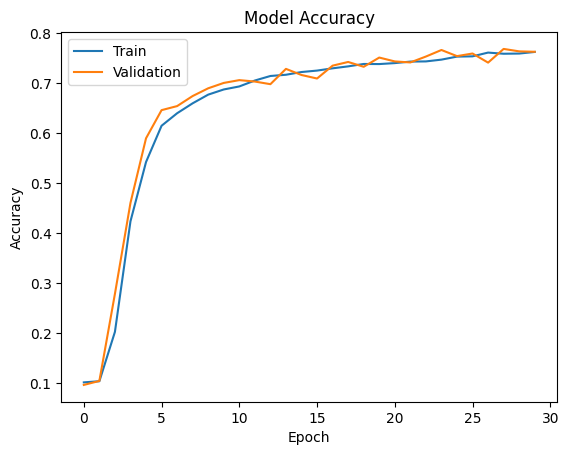

In [54]:
plt.plot(fit_history2.history['accuracy'])
plt.plot(fit_history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:_______**
Training accuracy = 76%, Validation accuracy = 76%

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [55]:
test_pred = model2.predict(X_test)
test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [56]:
# Converting each entry to single label from one-hot encoded vector
y_test_arg = np.argmax(y_test_encoded, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1814
           1       0.74      0.79      0.77      1828
           2       0.77      0.80      0.79      1803
           3       0.62      0.77      0.69      1719
           4       0.79      0.83      0.81      1812
           5       0.76      0.68      0.72      1768
           6       0.80      0.74      0.77      1832
           7       0.83      0.77      0.80      1808
           8       0.72      0.72      0.72      1812
           9       0.75      0.74      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



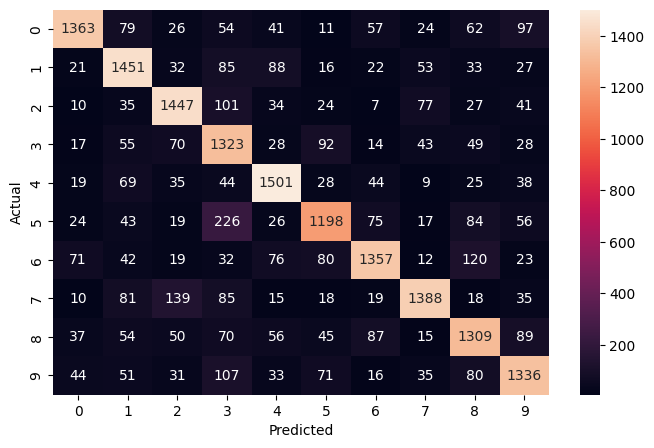

In [57]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test_arg,test_pred))

# Plotting the heatmap using confusion matrix

cm = tf.math.confusion_matrix(y_test_arg,test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:__________**
Number 8 has the lowest recall rate, and only 69% of the relevant images of number 8 were classified correctly.
Numbers 2, 4 and 7 have the highest f1-score.

Overall, the model is performing well with an accuracy of about 76%.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [7]:
h5f = h5py.File('/content/drive/MyDrive/DSML/ElectiveProject/DeepLearning/SVHN_single_grey1.h5',"r")

# Load the training and the test dataset
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [8]:
print(X_train.shape[0], X_test.shape[0])

42000 18000


**Observation:**
There are 42K images in training dataset and 18K in testing dataset


In [9]:
print(X_train.shape, X_test.shape)

(42000, 32, 32) (18000, 32, 32)


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [10]:
print(X_train[0].shape)
X_train[0]

(32, 32)


array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [11]:
def convert_3d_to_4d(image):
  """Converts a 3D image to a 4D image.
  Args:
    image: A 3D NumPy array.
  Returns:
    A 4D NumPy array.
  """

  # Create a 4D NumPy array with the desired dimensions.
  output = np.zeros((image.shape[0], image.shape[1], image.shape[2], 1))

  # Iterate over the 3D image and add each slice to the 4D array.
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      for k in range(image.shape[2]):
        output[i, j, k, 0] = image[i, j, k]

  # Return the 4D array.
  return output

In [12]:
X_train_4D = convert_3d_to_4d(X_train)

In [13]:
X_test_4D = convert_3d_to_4d(X_test)

In [14]:
print(X_train_4D.shape, X_test_4D.shape)

(42000, 32, 32, 1) (18000, 32, 32, 1)


Normalize inputs from 0-255 to 0-1

In [15]:
X_train_4D_normalized = X_train_4D/255
X_test_4D_normalized = X_test_4D/255

Print New shape of Training and Test

In [16]:
print(X_train_4D_normalized.shape, X_test_4D_normalized.shape)

(42000, 32, 32, 1) (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [17]:
y_train_encod = to_categorical(y_train)
y_test_encod = to_categorical(y_test)

In [18]:
print(y_train_encod[0])
print(y_test_encod[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Observation:**
The training and test datasets have been reshaped to 4D arrays. The data have been normalized to 0 - 1. Also, the training and testest labels were one-hot encoded


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [19]:
#fix the seed
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [20]:
def cnn_model_1():
  # Initialized a sequential model
  model = Sequential()

  # Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

  # The input_shape denotes dimensions of the input images
  model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

  # Adding LeakyRelu activation function with a negative slope of 0.1
  model.add(LeakyReLU(0.1))

  # Adding the second convolutional layer with 32 filters and the kernel size of 3x3
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

  # Adding LeakyRelu activation function with a negative slope of 0.1
  model.add(LeakyReLU(0.1))

  # Adding max pooling to reduce the size of the output of second convolutional layer
  model.add(MaxPooling2D(pool_size = (2, 2)))

  # Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
  model.add(Flatten())

  # Adding a fully connected dense layer with 32 neurons
  model.add(Dense(32))

  # Adding LeakyRelu activation function with a negative slope of 0.1
  model.add(LeakyReLU(0.1))

  # Adding the output layer with 10 neurons and 'softmax' activation function (for a multi-class classification problem)
  model.add(Dense(10, activation = 'softmax'))

  # Using Adam Optimizer
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  # return the model
  return model

In [21]:
#build CNN model 1
model3 = cnn_model_1()

In [22]:
#print model summary
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [23]:
# fit the model
fit_history3 = model3.fit(X_train_4D_normalized, y_train_encod,validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 32)

Epoch 1/20
1050/1050 [==============================] - 17s 6ms/step - loss: 1.1429 - accuracy: 0.6259 - val_loss: 0.6526 - val_accuracy: 0.8113
Epoch 2/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.5416 - accuracy: 0.8453 - val_loss: 0.5324 - val_accuracy: 0.8507
Epoch 3/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.4497 - accuracy: 0.8669 - val_loss: 0.5243 - val_accuracy: 0.8496
Epoch 4/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3863 - accuracy: 0.8849 - val_loss: 0.4448 - val_accuracy: 0.8743
Epoch 5/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.3375 - accuracy: 0.8985 - val_loss: 0.4684 - val_accuracy: 0.8718
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3004 - accuracy: 0.9096 - val_loss: 0.4732 - val_accuracy: 0.8714
Epoch 7/20
1050/1050 [==============================] - 6s 6ms/step - loss: 0.2724 - accuracy: 0.9169 - val_loss: 0.4639 - val_accuracy

### **Plot the Training and Validation Accuracies and Write your observations.**

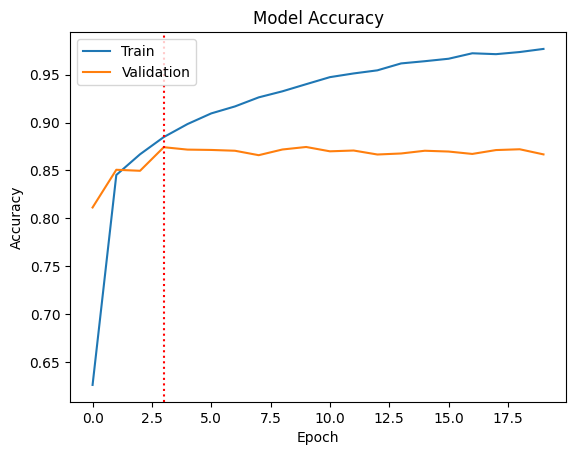

In [31]:
plt.plot(fit_history3.history['accuracy'])
plt.plot(fit_history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.axvline(x=3, linestyle = ":", color = "red")
# Display the plot
plt.show()

**Observations:__________**
We can see from the above plot that the model has done poorly on the validation data. The model is highly overfitting the training data.
The validation accuracy has become more or less constant after 3 epochs.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [32]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [33]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [41]:
def cnn_model_2():
  # Initialized a sequential model
  model = Sequential()

  # Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

  # The input_shape denotes dimensions of the input images
  model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

  # Adding LeakyRelu activation function with a negative slope of 0.1
  model.add(LeakyReLU(0.1))

  # Adding the second convolutional layer with 32 filters and the kernel size of 3x3
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

  # Adding LeakyRelu activation function with a negative slope of 0.1
  model.add(LeakyReLU(0.1))

  # Adding max pooling to reduce the size of the output of second convolutional layer
  model.add(MaxPooling2D(pool_size = (2, 2)))

  # Adding BatchNormalization
  model.add(BatchNormalization())

  # Adding the third convolutional layer with 32 filters and the kernel size of 3x3
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

  # Adding LeakyRelu activation function with a negative slope of 0.1
  model.add(LeakyReLU(0.1))

  # Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

  # Adding LeakyRelu activation function with a negative slope of 0.1
  model.add(LeakyReLU(0.1))

  # Adding max pooling to reduce the size of the output of fourth convolutional layer
  model.add(MaxPooling2D(pool_size = (2, 2)))

  # Adding BatchNormalization
  model.add(BatchNormalization())

  # Flattening the output of the convolutional layer after batch normalization to make it ready for creating dense connections
  model.add(Flatten())

  # Adding a fully connected dense layer with 32 neurons
  model.add(Dense(32))

  # Adding LeakyRelu activation function with a negative slope of 0.1
  model.add(LeakyReLU(0.1))

  # Adding dropout to randomly switch off 50% neurons to reduce overfitting
  model.add(Dropout(0.5))

  # Adding the output layer with 10 neurons and 'softmax' activation function (for a multi-class classification problem)
  model.add(Dense(10, activation = 'softmax'))

  # Using Adam Optimizer
  opt = Adam(learning_rate=0.001)

  # Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  # return the model
  return model

In [42]:
#build CNN model 2
model4 = cnn_model_2()

In [44]:
#print model summary
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                       

In [45]:
# fit the model
fit_history4 = model4.fit(X_train_4D_normalized, y_train_encod,validation_split = 0.2, verbose = 1, epochs = 30, batch_size = 128)

Epoch 1/30
263/263 [==============================] - 10s 13ms/step - loss: 1.3918 - accuracy: 0.5273 - val_loss: 1.7937 - val_accuracy: 0.3706
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 0.6751 - accuracy: 0.7928 - val_loss: 0.5427 - val_accuracy: 0.8490
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 0.5489 - accuracy: 0.8331 - val_loss: 0.5853 - val_accuracy: 0.8329
Epoch 4/30
263/263 [==============================] - 3s 12ms/step - loss: 0.4964 - accuracy: 0.8492 - val_loss: 0.4013 - val_accuracy: 0.8867
Epoch 5/30
263/263 [==============================] - 4s 14ms/step - loss: 0.4392 - accuracy: 0.8653 - val_loss: 0.4090 - val_accuracy: 0.8855
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 0.4124 - accuracy: 0.8751 - val_loss: 0.3851 - val_accuracy: 0.8911
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 0.3765 - accuracy: 0.8849 - val_loss: 0.5122 - val_accuracy: 0.859

### **Plot the Training and Validation accuracies and write your observations.**

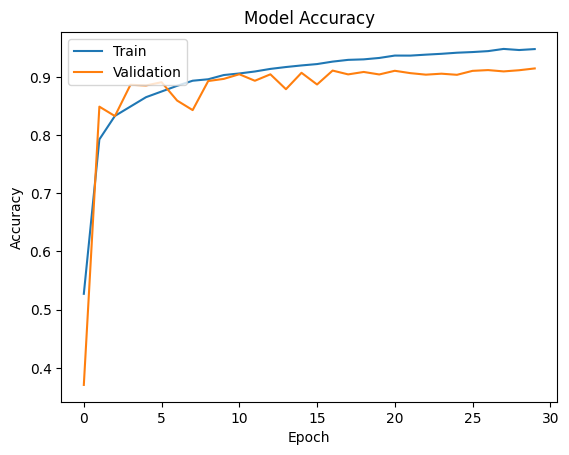

In [47]:
plt.plot(fit_history4.history['accuracy'])
plt.plot(fit_history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

**Observations:________**
The model training accuracy is slightly higher than the validation accuracy.
The validation accuracy has improved in comparison to the previous model.
We have been able to achieve the best validation accuracy so far. There are other pre-trained models which can be tried and/or tuned to get better performance.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [48]:
test_pred = model4.predict(X_test_4D_normalized)
test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 3ms/step


In [51]:
# Calculating the probability of the predicted class
test_max_probas = np.max(model4.predict(X_test_4D_normalized), axis = 1)


563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [49]:
# Converting each entry to single label from one-hot encoded vector
y_test_arg = np.argmax(y_test_encod, axis = -1)


### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1814
           1       0.90      0.92      0.91      1828
           2       0.93      0.92      0.93      1803
           3       0.88      0.89      0.89      1719
           4       0.93      0.94      0.93      1812
           5       0.93      0.90      0.91      1768
           6       0.90      0.91      0.90      1832
           7       0.93      0.94      0.93      1808
           8       0.92      0.89      0.90      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



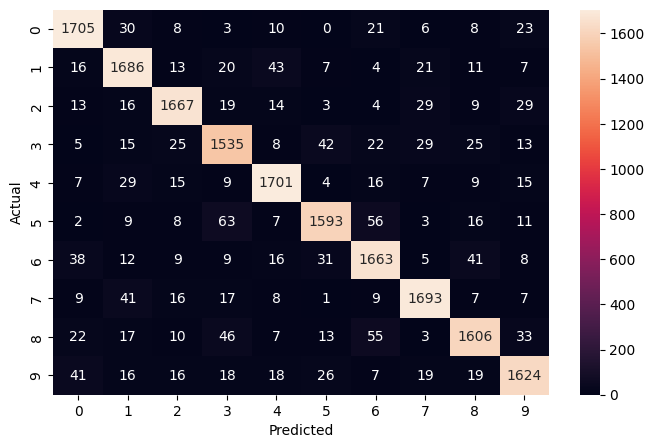

In [50]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test_arg,test_pred))

# Plotting the heatmap using confusion matrix

cm = tf.math.confusion_matrix(y_test_arg,test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:_________**

**The model is giving about 91% accuracy on the test data which is comparable

*   The model is giving about 91% accuracy on the test data which is comparable to the accuracy of the validation data. This implies that the model is giving a generalized performance.
*   Recall has a small range, which implies that the model is good at identifying most numbers.
*   Precision has a small range too, which implies that the model is good at distinguishing from other numbers.
*   Number 3 has the lowest recall, precision and f1 scores, indicating that it is the most difficult number to identify or distinguish from other numbers, resulting in low accuracy.

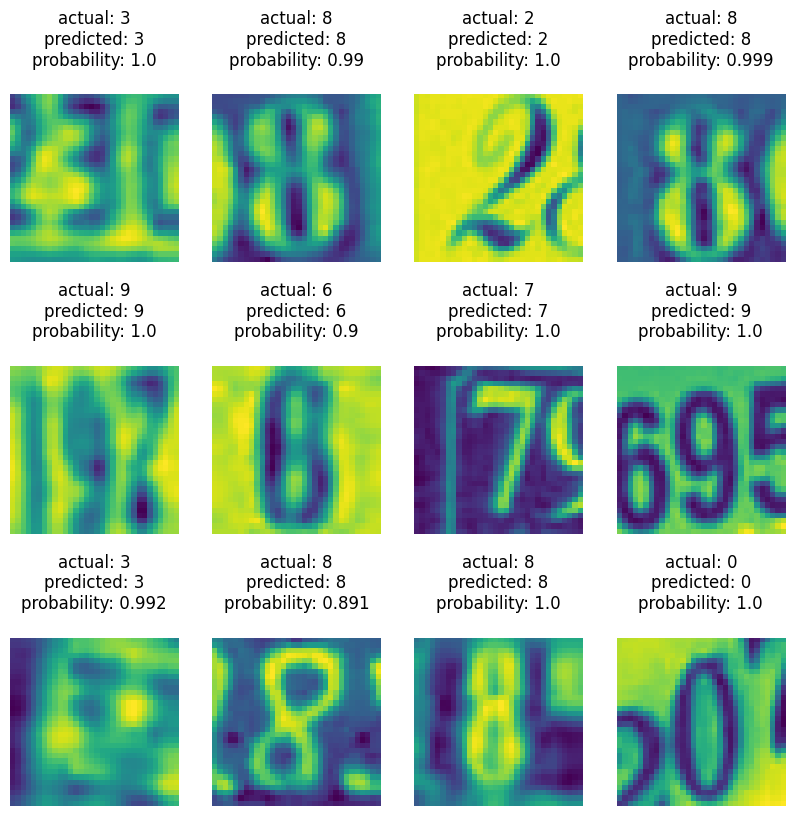

In [60]:
# visualizing the predicted numbers
rows = 3

cols = 4

fig = plt.figure(figsize = (10, 10))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(y_test))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        ax.imshow(X_test_4D[random_index, :])

        pred_label = test_pred[random_index]

        pred_proba = test_max_probas[random_index]

        true_label = y_test[random_index]

        plt.axis("off")

        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()